# 모듈 불러오기

In [11]:
import numpy as np # 배열 함수
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

import pandas as pd
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# 주소 불러오기

In [12]:
depression_path = r"C:\Users\USER\Desktop\졸업작품\depression"        #경로 설정
happiness_path = r"C:\Users\USER\Desktop\졸업작품\happy"              #경로 설정

# Image 불러오기, 배열 처리

glob  함수 : 해당 경로에 있는 파일들을 가져옴

* : 모든 문자와 매칭되는 표현식 ex) 'hello.jpg' = '*.jpg'

In [13]:
images = [image.load_img(p,target_size=(256,256)) for p in glob(depression_path +'\*.jpg') + glob(happiness_path +'\*.jpg')]

In [14]:
data = np.asarray([image.img_to_array(img) for img in tqdm(images)])

100%|██████████| 3977/3977 [00:01<00:00, 2028.78it/s]


In [15]:
data.shape

(3977, 256, 256, 3)

Image.open 함수는 말 그대로 이미지를 여는 것

In [16]:
data[0].shape

(256, 256, 3)

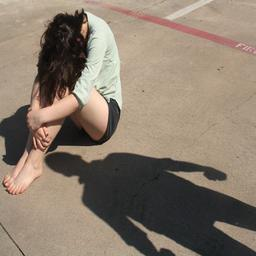

In [17]:
images[10]

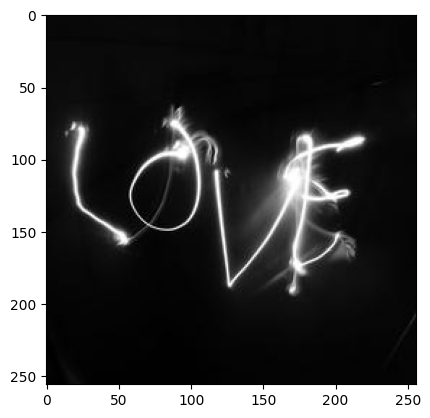

In [18]:
plt.imshow(data[2501].astype(np.int32))

가로 : 256, 세로 : 256, color image

# Label 만들기 - 정답 데이터
one-hot encoding : 머신러닝 알고리즘은 문자열 값을 입력 값으로 허락하지 않기 때문에 모든 문자열 값들을 범주형으로 인코딩하는 전처리 작업(Preprocessing) 후에 머신러닝 모델에 학습을 시켜야 한다.

In [19]:
dep = glob(depression_path +'\*.jpg')   # 위에서 설정한 경로에 있는 .jpg 파일들을 불러오기
ha = glob(happiness_path +'\*.jpg')     # 위에서 설정한 경로에 있는 .jpg 파일들을 불러오기   
print(len(dep)) # 개수 측정
print(len(ha))  # 개수 측정

2000
1977


In [20]:
dep_label = [0] * len(dep)     #슬픔과 관련된 이미지의 수만큼 dep_label에 0을 생성
ha_label = [1] * len(ha)       #행복과 관련된 이미지의 수만큼 ha_label에 1을 생성

print(dep_label)                #label이 제대로 생성됐는지 확인 - 정답 데이터
# print(ha_label)               #label이 제대로 생성됐는지 확인 - 정답 데이터

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
print(len(dep_label))       #label 갯수 측정
print(len(ha_label))        #label 갯수 측정

2000
1977


In [22]:
label = dep_label + ha_label        #슬픔(0)/행복(1)을 구분할 장답 데이터를 작성
len(label)

3977

In [23]:
len(label)

3977

In [24]:
label[0]

0

In [25]:
label = np.array(label)     #numpy 함수를 통해 일차원 배열 생성 (슬픔/행복)
print(label)

[0 0 0 ... 1 1 1]


In [45]:
from tensorflow.keras.utils import to_categorical  # one-hot-encoding 과정 (to_categorical 함수 => one-hot-encoding 시켜주는 함수) 

In [46]:
label_one_hot = to_categorical(label)   # label(정답 값)을 one-hot-encoding 시켜줌

In [47]:
label_one_hot[2050] # 행복 => [0, 1]로 설정

array([0., 1.], dtype=float32)

In [48]:
label_one_hot[0]    # 슬픔 => [1, 0]로 설정

array([1., 0.], dtype=float32)

# train_data_split

In [49]:
from sklearn.model_selection import train_test_split   # 모델 데이터 학습을 위한 train_test_split 모듈 생성 (학습 데이터 / 테스트 데이터 분리)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(data,label_one_hot,test_size=0.2,stratify=label_one_hot,random_state=42,shuffle=True) #훈련데이터랑 시험데이터로 나누기(data = x, label_one_hot = y)
###                                                                                                 # stratify값을 target 값으로 지정해주면 target의 class 비율을 유지 한 채로 데이터 셋을 split

stratify = label_one_hot은 데이터 불균형 문제 해결

학습할 때 행복 100, 슬픔 100, 총 200

160 행복 80 슬픔 80

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3181, 256, 256, 3)
(796, 256, 256, 3)
(3181, 2)
(796, 2)


In [52]:
# 정규화(Normalization) - Python의 이미지는 행렬 값에 0~255 안의 값을 가지고 있으므로 최대 값인 255.0으로 나누어 학습 속도를 빠르게 할 수 있음!!
X_train /= 255.0
X_test /= 255.0

# Model

In [53]:
input_shape = X_train[0].shape

In [54]:
input_shape # 이미지 값 ( 256*256 / 3(컬러) )

(256, 256, 3)

In [55]:
from tensorflow.keras.models import Sequential # Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#CNN 모델 작성

model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))  # 합성곱 커널 사이즈 5*5로 128개 생성 // strides=(1, 1) => 1칸씩 움직임 
model.add(MaxPooling2D(pool_size=(2, 2))) # MaxPooling2D => 과적합 방지를 위해 최댓값만을 추출 (2,2) 사이즈 // padding valid: 패딩 X (사이즈가 맞지 않을 경우 가장 우측의 열 혹은 가장 아래의 행을 제거) => 차원 축소
model.add(BatchNormalization()) # 하나의 batch마다 정규화 => 학습 속도 // 모델 안정화

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid',kernel_regularizer=l2(0.00005))) # 126*126에 대해 합성곱 커널 사이즈 3*3로 64개 생성 (차원 축소)       
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                    # activation='relu' => 활성화 함수 relu (경사하강법) 이용 // kernel_regularizer => 과적합(overfitting) 방지
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid',kernel_regularizer=l2(0.00005))) # 합성곱 커널 사이즈 3*3로 32개 생성
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())  # 30*30 행렬을  1자로 나열하여 노드 생성(28800개 생성) => Dense layer 연결

model.add(Dense(256, activation='relu'))    #  Dense layer 256개의 노드 생성 (학습 값 입력 / 출력)
model.add(Dropout(0.5)) # 과적합 방지 (일반화)
model.add(Dense(2, activation='softmax'))   # 2개의 노드 생성 (0, 1)               [13,7] => softmax => [0.6 0.4]  => [슬픔(1,0) / 행복(0,1)] => 0.6 -> 1.0 값이 근사하니까 슬픔 이미지이다. 
###                                                                                                                      # (0.6,0,4) / (0.6,0,4)  => 슬픔에 해당하는 이미지로 계산
    
  

과적합(Overfitting) : 학습 데이터에 너무 잘 학습해버림

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 128)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                      

In [58]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5) # 학습률을 조절 (5번의 학습동안 val_loss가 개선되지 않을 경우 학습률 변경)

In [61]:
optimizer = Adam(learning_rate=0.001) # 학습률 0.001 시작

In [62]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # 학습 방식에 대한 환경 설정
###                                                                                       # categorical_crossentropy => label이 one-hot-encoding 된 형태일 때 사용

2 가지 분류 -> binary_crossentropy
2 가지 넘어서 분류 - > categorical crossentropy

In [64]:
hist = model.fit(X_train,y_train, epochs=50, batch_size=128, validation_split=0.1)   # 학습 과정을 hist(히스토리) 기능을 통해 과정을 화면에 표시 (epochs : 학습 데이터 반복 횟수) // batch_size : 한 번에 학습할 때 사용하는 데이터 개수
###   validation_split=0.1 : 학습 데이터를 0.9 : 0.1로 나눔(학습 : 검증 데이터)         학습 데이터 손실값 (loss) // 학습 데이터 정확도 (acc) // 검증 손실값 (val_loss) // 검증 정확도 (val_acc)

Epoch 1/50
23/23 [==============================] - 277s 11s/step - loss: 0.5101 - accuracy: 0.8263 - val_loss: 1.2058 - val_accuracy: 0.5580
Epoch 2/50
23/23 [==============================] - 214s 9s/step - loss: 0.4113 - accuracy: 0.8609 - val_loss: 0.9032 - val_accuracy: 0.4953
Epoch 3/50
23/23 [==============================] - 212s 9s/step - loss: 0.3958 - accuracy: 0.8665 - val_loss: 0.9501 - val_accuracy: 0.4796
Epoch 4/50
23/23 [==============================] - 223s 10s/step - loss: 0.3286 - accuracy: 0.8934 - val_loss: 0.8893 - val_accuracy: 0.4702
Epoch 5/50
23/23 [==============================] - 221s 10s/step - loss: 0.2582 - accuracy: 0.9161 - val_loss: 1.2810 - val_accuracy: 0.4828
Epoch 6/50
23/23 [==============================] - 212s 9s/step - loss: 0.2312 - accuracy: 0.9203 - val_loss: 1.0346 - val_accuracy: 0.4890
Epoch 7/50
23/23 [==============================] - 206s 9s/step - loss: 0.1778 - accuracy: 0.9410 - val_loss: 0.9932 - val_accuracy: 0.5078
Epoch 8/50

In [65]:
model.save('model2.h5') # 학습한 모델을 'model2.h5' 파일로 저장

In [66]:
model.evaluate(X_test,y_test)  # X_test(데이터), y_test(정답)로 모델을 평가  // 학습된 모델을 바탕으로 시험 데이터를 넣었을 때 나오는 측정 값 => 실제로 이미지를 맞출 확률 약 60%

25/25 [==============================] - 9s 365ms/step - loss: 4.5065 - accuracy: 0.5967


[4.506471633911133, 0.5967336893081665]

In [68]:
new_model = tf.keras.models.load_model(r'C:\Users\USER\Desktop\IC\model2.h5') # 모델을 불러올 수 있는지 확인

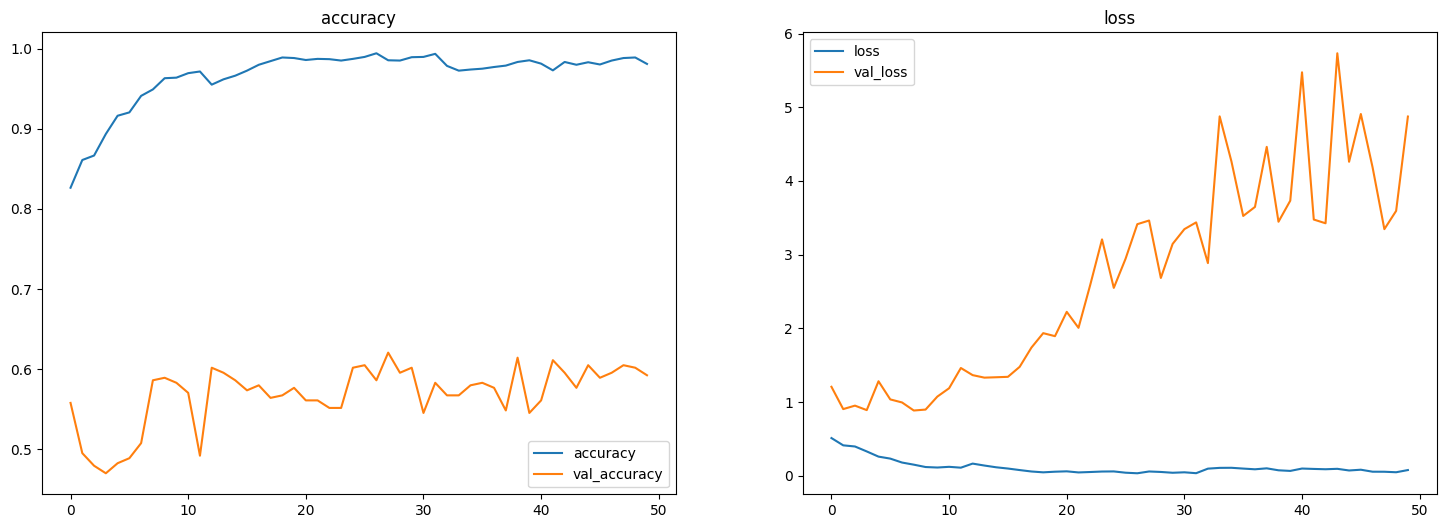

In [69]:
plt.figure(figsize=(18, 6))                         #fit한 모델을 그래프로 분석

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [70]:
X_test[0].shape

(256, 256, 3)

In [91]:
np.argmax(model.predict(X_test[4].reshape(1,256,256,3)))       # 이미지를 분석했을 때 모델이 예측한 값의 최댓 값 인덱스를 불러옴 => 0(슬픔) / 1(행복)

1/1 [==============================] - 0s 33ms/step


1

In [106]:
model.predict(X_test[6].reshape(1,256,256,3)) # 표본 테스트

1/1 [==============================] - 0s 37ms/step


array([[0.5577902, 0.4422098]], dtype=float32)